## Generation of visual panoramas to be tested for head direction stability

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises
from skimage.morphology import disk
from scipy.signal import convolve2d, correlate
from scipy.stats import zscore

np.random.seed(seed=3)

In [4]:
panH = 34 + 5 # mm (2x visible screen height + some buffer)
panR = 58 # mm, this should be the same as the max. distance of the screen from the fly (= face of pentagon)
dpiVal = 1000

panWidth_px = int(2*np.pi*panR*dpiVal/100)
panHeight_px = int(panH*dpiVal/100)
maxBit = 255 #assuming 8bit image depth

dotSizeAng = 12 #aim for x deg dot

In [5]:
# Values to set in unity scene:
print('Cylinder height: {}, Cylinder radius: {}'.format(panH/2, panR))

Cylinder height: 19.5, Cylinder radius: 58


## Stimuli with clear orientation information
Vary just the brightness and test on vs. off features
#### (1) Generate a sun spot and the inverse image 

In [40]:
#covnert angular dot size to pixel size and make dot
dotRad = round(dotSizeAng/360 * panWidth_px * 1/2 )
mydot = disk(radius=dotRad)

dotpos_x = round(panWidth_px/2)
dotpos_y = round((panHeight_px + dotRad)/2)

pan = np.zeros((panWidth_px,panHeight_px),dtype=np.uint8)
pan[dotpos_x, dotpos_y] = maxBit
pan[:,:] = convolve2d(pan[:,:], mydot, boundary = 'wrap', mode='same')

pan = np.minimum(maxBit, pan)

In [41]:
darkSpot = pan[:,:]
brightSpot = abs(maxBit - darkSpot)

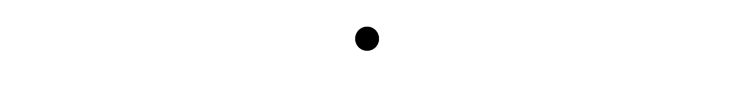

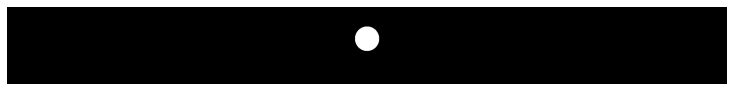

In [42]:
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(darkSpot.T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("darkSpot.tiff",dpi = dpiVal)

fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(brightSpot.T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("brightSpot.tiff", dpi = dpiVal)

#### Generate two sun panoramas with matching overall brightness but opposide contrast

In [108]:
panOn = darkSpot
panOff = maxBit-panOn
panOn = np.minimum(maxBit, panOn)
panOff = np.minimum(maxBit, panOff)

dotRatio = np.sum(panOn/maxBit)/(panWidth_px*panHeight_px)
panOn_shift = panOn/2 + (0.5-dotRatio*0.5)*maxBit
panOff_shift = panOff/2

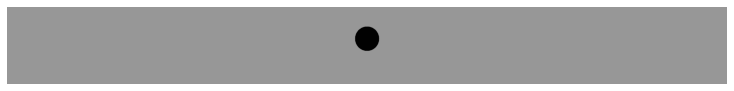

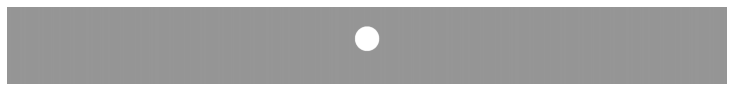

In [109]:
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panOn_shift.T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("darkOnGrey.tiff",dpi = 1000)

fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panOff_shift.T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("brightOnGrey.tiff", dpi = 1000)

In [110]:
print(np.sum(panOn))
print(np.sum(panOff))

print(np.sum(panOn_shift)/np.sum(panOff_shift))

2978655
359417145
1.0082874594087596


**Follow up stimulus with darker grey background**

In [138]:
panOn_dark = panOn_shift + 0.2*maxBit
panOff_dark = panOff_shift + 0.2*maxBit
panOn_dark = np.minimum(maxBit, panOn_dark)
panOff_dark[panOff_dark < 0.5*maxBit] = np.median(panOn_dark) - (maxBit - np.median(panOn_dark))

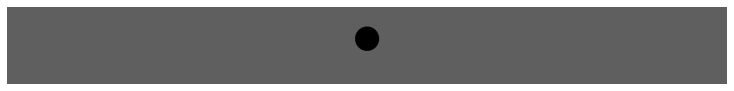

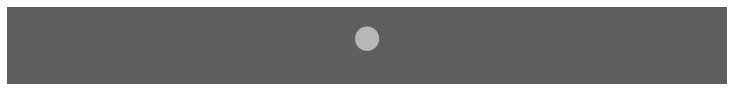

In [139]:
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panOn_dark.T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("darkOnDarkGrey.tiff",dpi = 1000)

fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panOff_dark.T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("brightOnDarkGrey.tiff", dpi = 1000)

In [140]:
print(np.sum(panOn_dark)/np.sum(panOff_dark))

1.001323748714143


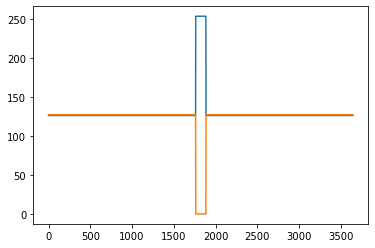

In [141]:
plt.plot(panOn_shift.T[dotpos_y,:])
plt.plot(panOff_shift.T[dotpos_y,:])

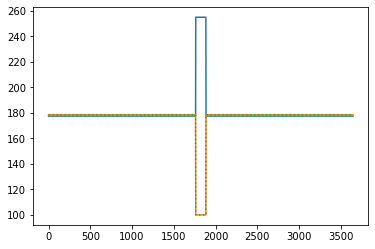

In [143]:
plt.plot(panOn_dark.T[dotpos_y,:])
plt.plot(panOff_dark.T[dotpos_y,:])

#### (2) Generate a gradient

In [53]:
panGrad = np.tile( (np.sin(np.linspace(0,np.pi*2,panWidth_px)) + 1)*maxBit/2 ,panHeight_px).reshape(panHeight_px,panWidth_px)
panGradLow = np.tile( (np.sin(np.linspace(0,np.pi*2,panWidth_px)) + 2)*maxBit/4 ,panHeight_px).reshape(panHeight_px,panWidth_px)

panGradVeryLow = np.tile( (np.sin(np.linspace(0,np.pi*2,panWidth_px)) + 4)*maxBit/8 ,panHeight_px).reshape(panHeight_px,panWidth_px)

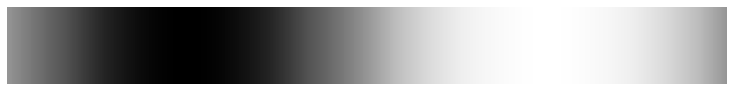

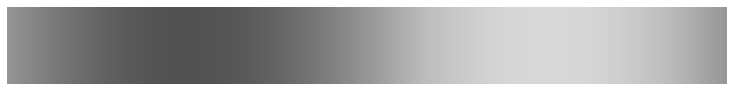

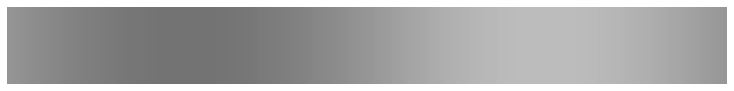

In [54]:
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panGrad,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("gradient.tiff",dpi = 1000)

fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panGradLow,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("gradientLow.tiff",dpi = 1000)

fig = plt.figure(frameon=False)
fig.set_size_inches(10,10*panHeight_px/panWidth_px)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(panGradVeryLow,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
fig.savefig("gradientVeryLow.tiff",dpi = 1000)

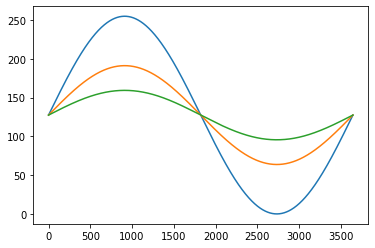

In [55]:
plt.plot(panGrad[0,:])
plt.plot(panGradLow[0,:])
plt.plot(panGradVeryLow[0,:])

## Test effect of feature size

In [56]:
kappa = 1.2 #shape parameter for von mieses
elevationrange = 40

numDots = [0,4,24]
dotSizeAng = 20 #aim for x deg dot

#covnert angular dot size to pixel size and make dot
dotRad = round(dotSizeAng/360 * panWidth_px * 1/2 )
mydot = disk(radius=dotRad)

In [41]:
dotpos = []
for cond, n in enumerate(numDots):
    # place one dot at center:
    pan[round(panWidth_px/2), round(panHeight_px/2), cond] = maxBit
    
    dotpos_x = ((vonmises.rvs(kappa, size=n) + np.pi) * panWidth_px/(2*np.pi)).astype('int')
    dotpos_y = (np.random.uniform(0.5-elevationrange/360,0.5+elevationrange/360, n) * 
                panHeight_px).astype('int')
    for c in range(numDots[cond]):
        pan[dotpos_x[c], dotpos_y[c], cond] = maxBit
    
    if n > 0:
        dotpos.append([ np.hstack((round(panWidth_px/2),dotpos_x)), 
                                    np.hstack((round(panHeight_px/2),dotpos_y)) ] )
    else:
        dotpos.append([round(panWidth_px/2),round(panHeight_px/2)])

In [55]:
numDots

array([ 4, 19, 99])

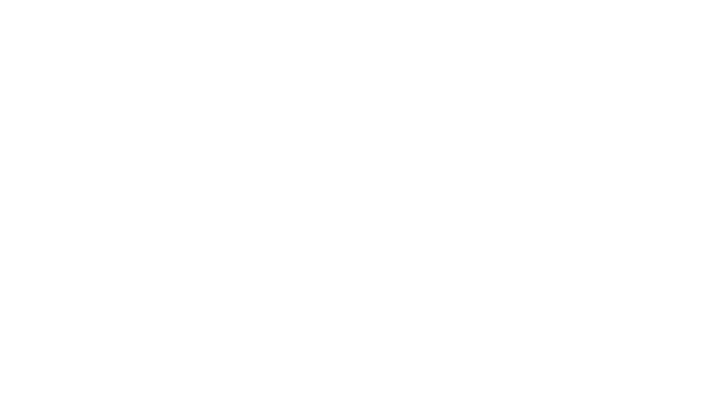

In [58]:
pan = np.zeros((panWidth_px,panHeight_px,len(numDots)),dtype=np.uint8)
panPlot = np.minimum(maxBit, pan)
panCorr = np.zeros((panWidth_px,panHeight_px,len(numDots)))

fig, axs = plt.subplots(len(numDots),2, figsize=(10,6))

for cond, n in enumerate(numDots):
    # place one dot at center:
    pan[round(panWidth_px/2), round(panHeight_px/2), cond] = maxBit
    
    dotpos_x = dotpos[cond][0]
    dotpos_y = dotpos[cond][1]
    for c in range(numDots[cond]):
        pan[dotpos_x[c], dotpos_y[c], cond] = maxBit
    pan[:,:,cond] = convolve2d(pan[:,:,cond], mydot, boundary = 'wrap', mode='same')
    
    panPlot_zsc = zscore(panPlot[:,:,cond].astype('float'), axis=None)
    panCorr[:,:,cond] = correlate(panPlot_zsc, panPlot_zsc, mode='same')
    axs[cond,0].imshow(panPlot[:,:,cond].T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
    axs[cond,1].imshow(panCorr[:,:,cond].T,origin='lower', cmap='Greys')
    for ax in axs[cond,:]: ax.axis('off')
fig.tight_layout()

In [ ]:
smalldotSizeAng/dotSizeAng

In [ ]:
numSubDots = (np.asarray([1,4.75,24.75])*4).astype('int')
numSubDots

TypeError: 'int' object is not subscriptable

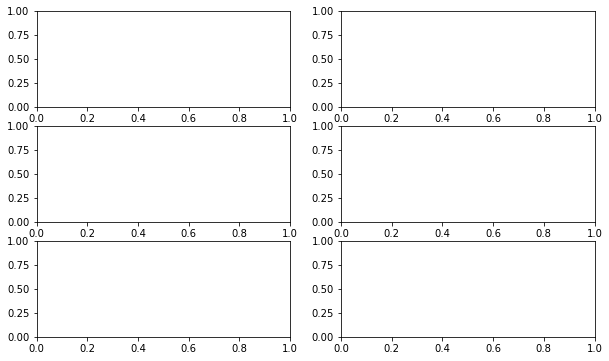

In [48]:
smalldotSizeAng = 5 
numSubDots = (np.asarray([1,4.75,24.75])*4).astype('int')

#covnert angular dot size to pixel size and make dot
dotRad = round(dotSizeAng/360 * panWidth_px * 1/2 )
mydot = disk(radius=dotRad)

pan2 = np.zeros((panWidth_px,panHeight_px,len(numDots)),dtype=np.uint8)
pan2Plot = np.minimum(maxBit, pan)
pan2Corr = np.zeros((panWidth_px,panHeight_px,len(numDots)))

fig, axs = plt.subplots(len(numDots),2, figsize=(10,6))

for cond, n in enumerate(numDots):
    # place one dot at center:
    pan2[round(panWidth_px/2), round(panHeight_px/2), cond] = maxBit
    
    dotpos_x = dotpos[cond][0]
    dotpos_y = dotpos[cond][1]
    for c in range(numDots[cond]):
        pan2[dotpos_x[c], dotpos_y[c], cond] = maxBit
    pan2[:,:,cond] = convolve2d(pan[:,:,cond], mydot, boundary = 'wrap', mode='same')
    
    pan2Plot_zsc = zscore(pan2Plot[:,:,cond].astype('float'), axis=None)
    pan2Corr[:,:,cond] = correlate(pan2Plot_zsc, pan2Plot_zsc, mode='same')
    axs[cond,0].imshow(pan2Plot[:,:,cond].T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
    axs[cond,1].imshow(pan2Corr[:,:,cond].T,origin='lower', cmap='Greys')
    for ax in axs[cond,:]: ax.axis('off')

fig.tight_layout()   

In [44]:
for cond, n in enumerate(numDots):
    print(n+1)
    
    print('xpos = {}'.format(dotpos[cond][0]))
    print('ypos = {}'.format(dotpos[cond][1]))
    
    print("...")

1
xpos = 1200
ypos = 400
...
5
xpos = [1200 1318  815 1615 1031]
ypos = [400 459 342 353 340]
...
25
xpos = [1200 1208 1456  832 1998 1399 1640 1209 1285 1103 1113 1830  705  827
  390 1355 1361  635  977 1474 1698 2341  683 2080 1495]
ypos = [400 325 452 417 466 453 382 335 358 311 427 326 342 354 383 433 390 400
 327 371 347 442 314 420 435]
...


In [ ]:
numDots = [0,4,49]

kappa = 1.2 #shape parameter for von mieses

elevationrange = 40

#covnert angular dot size to pixel size and make dot
dotRad = round(dotSizeAng/360 * panWidth_px * 1/2 )
mydot = disk(radius=dotRad)

pan = np.zeros((panWidth_px,panHeight_px,len(numDots)),dtype=np.uint8)

for cond, n in enumerate(numDots):
    # place one dot at center:
    pan[round(panWidth_px/2), round(panHeight_px/2), cond] = maxBit
    
    dotpos_x = ((vonmises.rvs(kappa, size=n) + np.pi) * panWidth_px/(2*np.pi)).astype('int')
    dotpos_y = (np.random.uniform(0.5-elevationrange/360,0.5+elevationrange/360, n) * panHeight_px).astype('int')
    for c in range(numDots[cond]):
        pan[dotpos_x[c], dotpos_y[c], cond] = maxBit
    pan[:,:,cond] = convolve2d(pan[:,:,cond], mydot, boundary = 'wrap', mode='same')

In [ ]:
panPlot = np.minimum(maxBit, pan)
panCorr = np.zeros((panWidth_px,panHeight_px,len(numDots)))

fig, axs = plt.subplots(len(numDots),2, figsize=(10,6))

for cond, n in enumerate(numDots):
    panPlot_zsc = zscore(panPlot[:,:,cond].astype('float'), axis=None)
    panCorr[:,:,cond] = correlate(panPlot_zsc, panPlot_zsc, mode='same')
    axs[cond,0].imshow(panPlot[:,:,cond].T,origin='lower', cmap='Greys', vmin=0, vmax=maxBit)
    axs[cond,1].imshow(panCorr[:,:,cond].T,origin='lower', cmap='Greys')
    
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(6,5))
for cond, n in enumerate(numDots):
    axs.plot(np.sum(panCorr[:,:,cond], axis=1), label='{} dots'.format(n+1))
axs.legend()